# Gaussian Mixture Models
In this notebook we will look at how a Gaussian Mixture model works 

The GMM uses an expectaction-maximization (EM) algorithm.  This alternates between updating the membership of the pixel based on the current estimate of the mean and variance of the clusters (expectation step) and updating the mean and variance of the clusters based on the current estimate of the memberships (maximization step).  This code implements a simple two-cluster system, but this method can be generalized to many clusters and multispectral data (color images)

The steps of EM are:
* Step 1.  Guess mean and variance for two clusters
* Step 2.  Calculate the probability of each pixel belonging to each cluster using the mean and variance of that cluster
* Step 3.  Using weighting based on the probabilities, compute a new mean and variance for each cluster.
* Step 4.  repeat step 2 & 3 

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# I'll use this later to draw the memberships of the two groups 
from matplotlib.colors import ListedColormap
binary_cmap = ListedColormap(['red', 'blue'])

In [3]:
class Gaussian:
    # Univariate Gaussian cluster
    def __init__(self,mu,sigma):
        self.mu = mu
        self.sigma=abs(sigma)
    def pdf(self,data):
        # return the probability of data belonging to this cluster based on a normal distribution
        # note, you can use any distribution for this, but Gaussian mixture models typically use a Gaussian PDF
        s = (data - self.mu)/self.sigma
        return 1/(np.sqrt(2*np.pi)*self.sigma)*np.exp(-s**2/2)


def Expectation_Step(data,Gdist1,Gdist2):
    # The E-step computes the probability membership to the clusters based on the current estimates of the gaussians
    prob1 = Gdist1.pdf(data)
    prob2 = Gdist2.pdf(data)

    # Return a normalized probability (e.g. .50 would be equally likely to be either cluster)
    return prob1/(prob1+prob2),prob2/(prob1+prob2)
        


def Maximization_Step(data,prob1,prob2):
    # The M-step updates the mu and sigma for all the clusters based on the current estimates of the memberships
    mu1 = np.sum(data*prob1,axis=None)/np.sum(prob1,axis=None)
    mu2 = np.sum(data*prob2,axis=None)/np.sum(prob2,axis=None)

    sigma1 = np.sqrt(np.sum(prob1*(data-mu1)**2,axis=None)/np.sum(prob1,axis=None))
    sigma2 = np.sqrt(np.sum(prob2*(data-mu2)**2,axis=None)/np.sum(prob2,axis=None))

    return Gaussian(mu1,sigma1),Gaussian(mu2,sigma2)




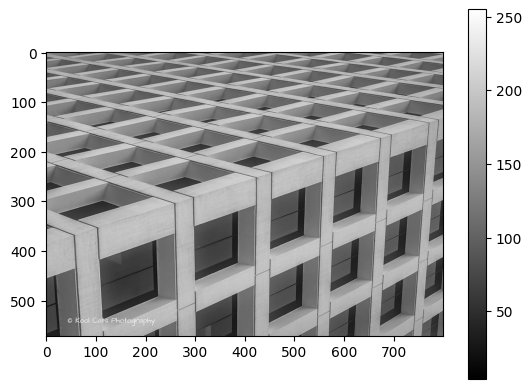

In [4]:
im = cv2.imread(os.path.relpath('../../Data/building-windows.jpg'), cv2.IMREAD_GRAYSCALE)

ax=plt.imshow(im,cmap='gray')
plt.colorbar(ax)

In [5]:
# based on the image, let's make our initial guess of the two means
G1 = Gaussian(250,50)
G2 = Gaussian(100,50)

Text(0.5, 1.0, 'Most likely group')

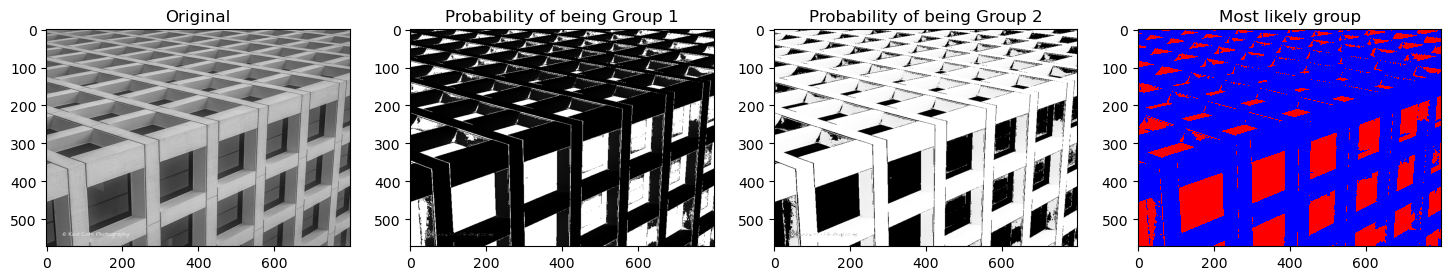

In [5]:
# Let's look at a single iteration first

# Based on our initial guess of the distributions, assign the expected membership
prob1,prob2 = Expectation_Step(im,G1,G2)

membership = (prob1<prob2)  # True if more likely to be group 2

# Now, based on the probability of each group, update the Gaussian distibutions

G1,G2 = Maximization_Step(im,prob1,prob2)

# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(141);plt.imshow(im,cmap='gray');  plt.title("Original")
plt.subplot(142);plt.imshow(prob1,cmap='gray');plt.title("Probability of being Group 1")
plt.subplot(143);plt.imshow(prob2,cmap='gray');plt.title("Probability of being Group 2")
plt.subplot(144);plt.imshow(membership,cmap=binary_cmap);  plt.title("Most likely group")

In [6]:
# Now, let's run this for 20 iterations

for iter in range(0,20):
    # E-step
    prob1,prob2 = Expectation_Step(im,G1,G2)
    # M-step
    G1,G2 = Maximization_Step(im,prob1,prob2)
    print(f'Iteration={iter=} Means=[{G1.mu=:.2f},{G2.mu=:.2f}] Sigma=[{G1.sigma=:.2f},{G2.sigma=:.2f}]')


Iteration=iter=0 Means=[G1.mu=84.61,G2.mu=169.11] Sigma=[G1.sigma=24.92,G2.sigma=29.81]
Iteration=iter=1 Means=[G1.mu=88.65,G2.mu=174.21] Sigma=[G1.sigma=26.02,G2.sigma=25.30]
Iteration=iter=2 Means=[G1.mu=91.37,G2.mu=177.88] Sigma=[G1.sigma=26.89,G2.sigma=21.30]
Iteration=iter=3 Means=[G1.mu=93.67,G2.mu=180.52] Sigma=[G1.sigma=27.84,G2.sigma=18.19]
Iteration=iter=4 Means=[G1.mu=95.75,G2.mu=182.47] Sigma=[G1.sigma=28.90,G2.sigma=15.88]
Iteration=iter=5 Means=[G1.mu=97.58,G2.mu=183.95] Sigma=[G1.sigma=29.93,G2.sigma=14.10]
Iteration=iter=6 Means=[G1.mu=99.11,G2.mu=185.05] Sigma=[G1.sigma=30.87,G2.sigma=12.74]
Iteration=iter=7 Means=[G1.mu=100.38,G2.mu=185.79] Sigma=[G1.sigma=31.77,G2.sigma=11.72]
Iteration=iter=8 Means=[G1.mu=101.41,G2.mu=186.30] Sigma=[G1.sigma=32.55,G2.sigma=10.99]
Iteration=iter=9 Means=[G1.mu=102.20,G2.mu=186.64] Sigma=[G1.sigma=33.15,G2.sigma=10.52]
Iteration=iter=10 Means=[G1.mu=102.76,G2.mu=186.87] Sigma=[G1.sigma=33.58,G2.sigma=10.22]
Iteration=iter=11 Means=[G1

Text(0.5, 1.0, 'Most likely group')

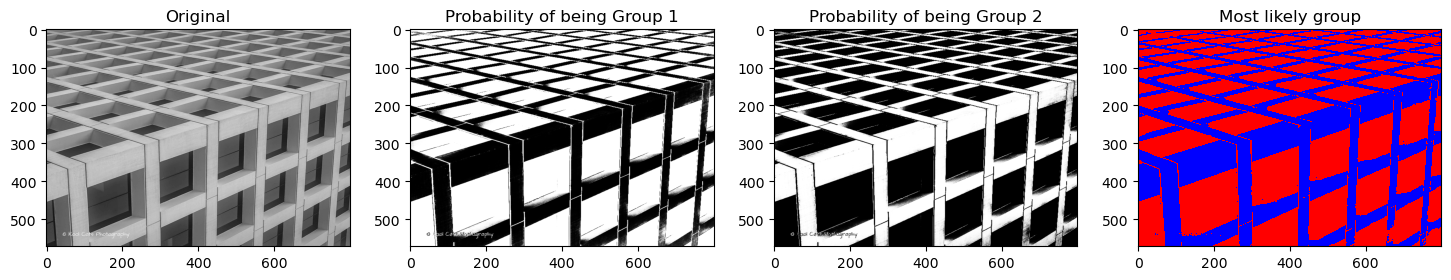

In [7]:
membership = (prob2>prob1)  # Get the final memberships

# Show the images
plt.figure(figsize=[18, 5])

plt.subplot(141);plt.imshow(im,cmap='gray');  plt.title("Original")
plt.subplot(142);plt.imshow(prob1,cmap='gray');plt.title("Probability of being Group 1")
plt.subplot(143);plt.imshow(prob2,cmap='gray');plt.title("Probability of being Group 2")
plt.subplot(144);plt.imshow(membership,cmap=binary_cmap);  plt.title("Most likely group")